In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data.csv')

# Display basic info and check for missing values
print(data.info())
print(data.isnull().sum())

# Drop rows or fill missing values (example: median for numeric data)
data = data.dropna(subset=['averageRating'])  # Drop rows where 'averageRating' is missing
data['numVotes'] = data['numVotes'].fillna(data['numVotes'].median())
data['releaseYear'] = data['releaseYear'].fillna(data['releaseYear'].median())
data['genres'] = data['genres'].fillna('Unknown')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030164 entries, 0 to 1030163
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1030164 non-null  object 
 1   title          1030162 non-null  object 
 2   type           1030164 non-null  object 
 3   genres         929510 non-null   object 
 4   averageRating  439631 non-null   float64
 5   numVotes       439631 non-null   float64
 6   releaseYear    901557 non-null   float64
dtypes: float64(3), object(4)
memory usage: 55.0+ MB
None
id                    0
title                 2
type                  0
genres           100654
averageRating    590533
numVotes         590533
releaseYear      128607
dtype: int64


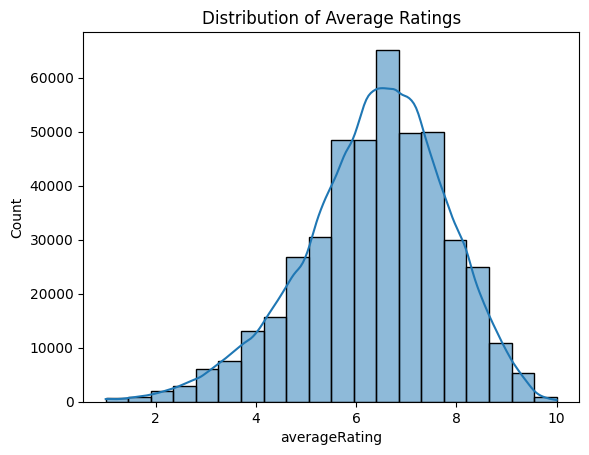

ValueError: could not convert string to float: 'tt0000009'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of numerical columns
sns.histplot(data['averageRating'], kde=True, bins=20)
plt.title('Distribution of Average Ratings')
plt.show()

# Correlation heatmap
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Count plot for content type
sns.countplot(x='type', data=data)
plt.title('Content Type Distribution')
plt.show()


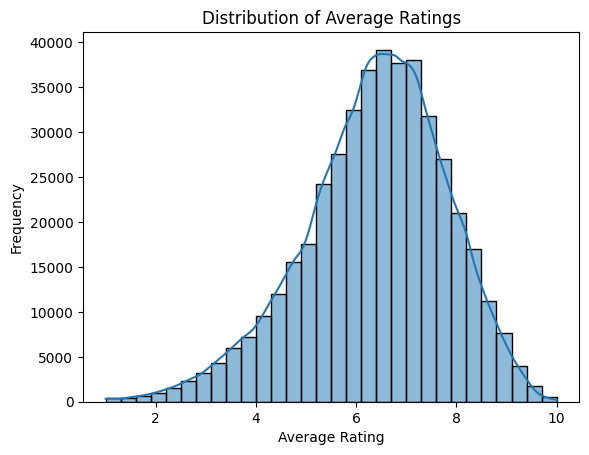

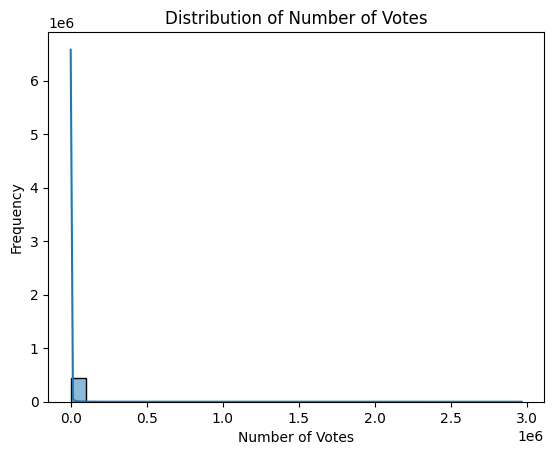

In [3]:
# Plot distribution of ratings (averageRating)
sns.histplot(data['averageRating'], kde=True, bins=30)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of the number of votes (numVotes)
sns.histplot(data['numVotes'], kde=True, bins=30)
plt.title('Distribution of Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()


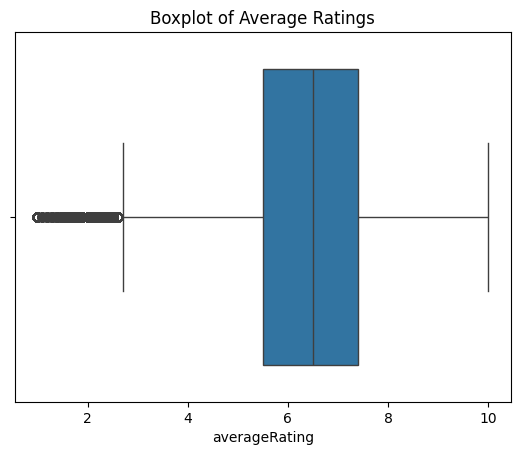

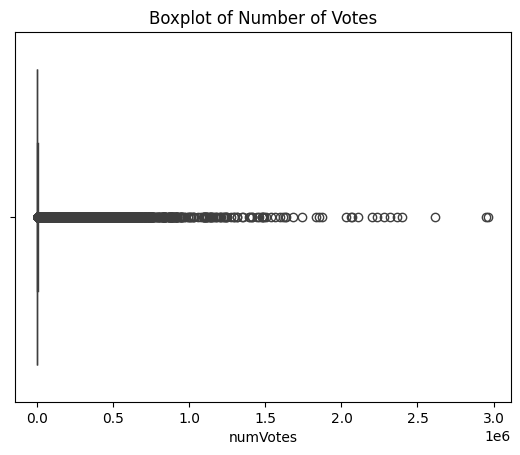

In [4]:
# Boxplot for averageRating to check for outliers
sns.boxplot(x=data['averageRating'])
plt.title('Boxplot of Average Ratings')
plt.show()

# Boxplot for numVotes to check for outliers
sns.boxplot(x=data['numVotes'])
plt.title('Boxplot of Number of Votes')
plt.show()


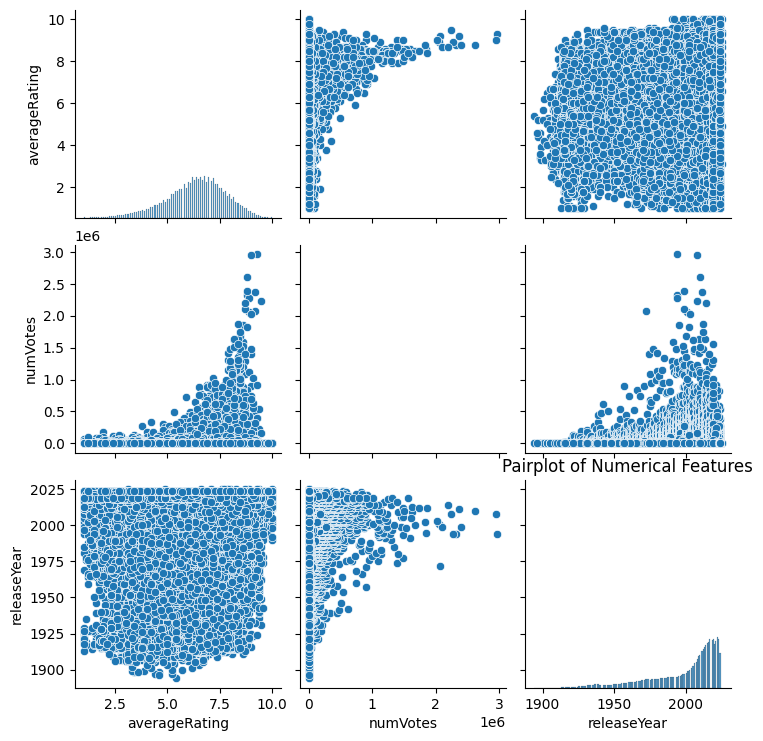

In [5]:
# Pairplot of numeric columns to see relationships between features
sns.pairplot(data[['averageRating', 'numVotes', 'releaseYear']])
plt.title('Pairplot of Numerical Features')
plt.show()


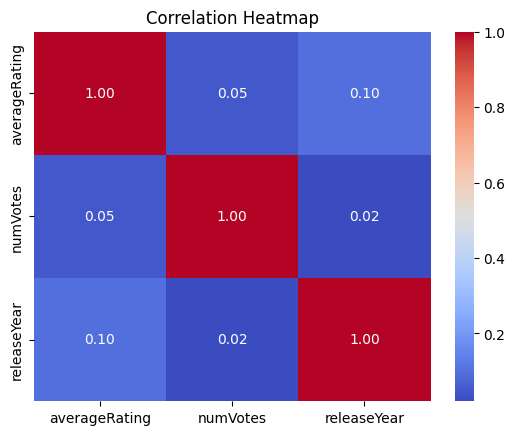

In [7]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = numeric_data.corr()

# Plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



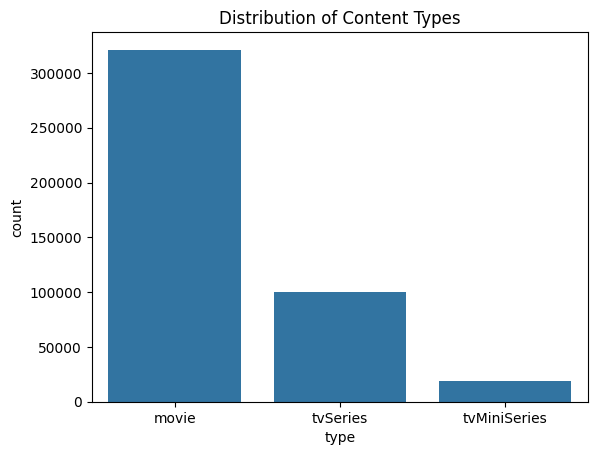

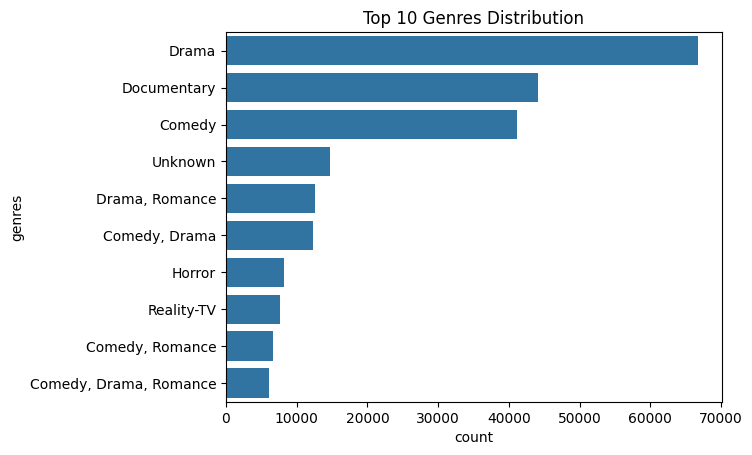

In [8]:
# Countplot for 'type' (Content Type: movie, show)
sns.countplot(x='type', data=data)
plt.title('Distribution of Content Types')
plt.show()

# Countplot for 'genres' (This will be a large number of unique genres)
sns.countplot(y='genres', data=data, order=data['genres'].value_counts().index[:10])  # Top 10 genres
plt.title('Top 10 Genres Distribution')
plt.show()


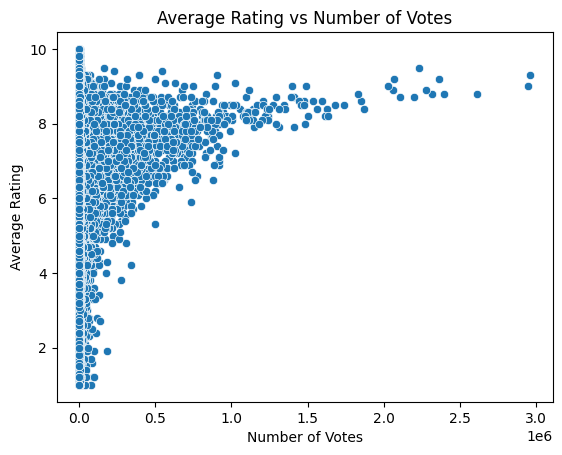

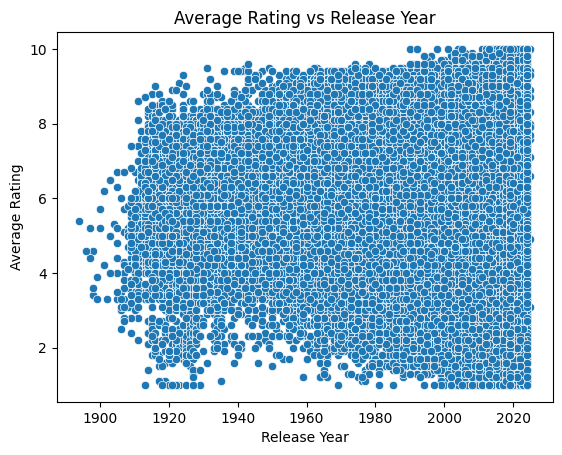

In [9]:
# Scatter plot for averageRating vs numVotes
sns.scatterplot(x='numVotes', y='averageRating', data=data)
plt.title('Average Rating vs Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.show()

# Scatter plot for averageRating vs releaseYear
sns.scatterplot(x='releaseYear', y='averageRating', data=data)
plt.title('Average Rating vs Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.show()


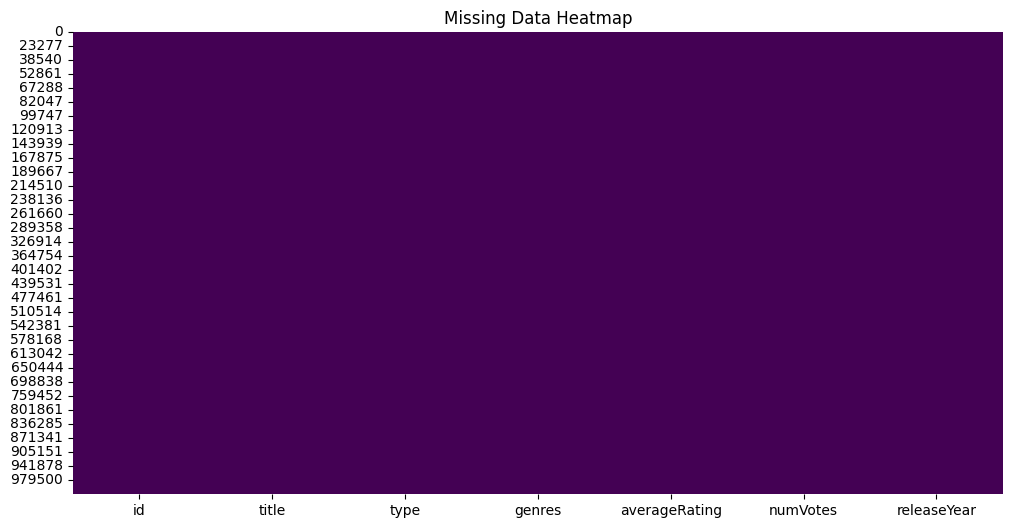

In [11]:
import seaborn as sns

# Plot missing data as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()



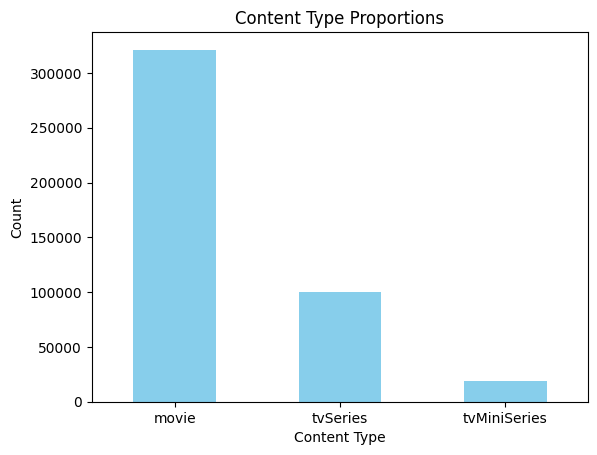

In [14]:
# Proportions of content types (type)
type_counts = data['type'].value_counts()
type_counts.plot(kind='bar', title='Content Type Proportions', color='skyblue')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


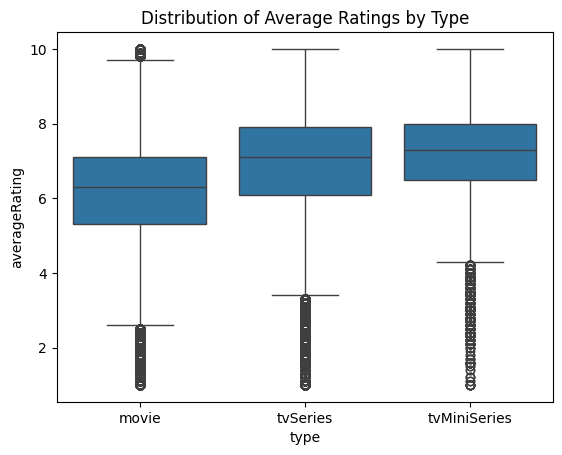

In [15]:
# Distribution of averageRating by type
sns.boxplot(x='type', y='averageRating', data=data)
plt.title('Distribution of Average Ratings by Type')
plt.show()


RandomForestRegressor(random_state=42)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate using metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.785079279789972
R-squared: 0.1326774385348377


In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
data = pd.read_csv('/mnt/data/data.csv')  # Update with your file path

# Data cleaning: Handle missing values (if any)
data = data.dropna()  # Drop rows with missing values

# If the dataset contains categorical columns, you may need to encode them
label_encoder = LabelEncoder()
categorical_columns = ['type', 'genres']  # Replace with actual column names in your dataset
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Explore the data using EDA
print(data.head())
print(data.describe())

# Seaborn Pairplot for EDA (shows relationships between features)
sns.pairplot(data)
plt.suptitle('Pairplot of Dataset', y=1.02)
plt.show()

# Correlation heatmap to understand relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Splitting data into features and target variable
# Assuming 'target_column' is your target variable (replace with actual column name)
X = data.drop(columns=['target_column'])  # Features
y = data['target_column']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Feature importance plot using Seaborn
importances = model.feature_importances_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Seaborn barplot for feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.show()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=2, sco


SyntaxError: incomplete input (3544557727.py, line 77)

In [12]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}

# Initialize GridSearchCV with the RandomForestRegressor and parameter grid
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=2,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Final evaluation with the best model
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
print(f'Mean Squared Error (Best Model): {mse_best}')
print(f'Mean Absolute Error (Best Model): {mae_best}')


NameError: name 'X_train' is not defined

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
# Correcting the file path
data = pd.read_csv('/Users/nikhilkumar/Desktop/python/data.csv')




# Display the first few rows of the dataset
print(data.head())

# Data Preprocessing (Handle categorical variables if necessary)
# Example: Assuming 'type' and 'genres' are categorical columns
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])
data['genres'] = label_encoder.fit_transform(data['genres'])

# Select features (X) and target (y)
X = data.drop(columns=['target_column'])  # Replace 'target_column' with the actual target column name
y = data['target_column']  # Replace 'target_column' with the actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}

# Initialize GridSearchCV with the RandomForestRegressor and parameter grid
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=2,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Final evaluation with the best model
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
print(f'Mean Squared Error (Best Model): {mse_best}')
print(f'Mean Absolute Error (Best Model): {mae_best}')



          id                          title   type  \
0  tt0000009                     Miss Jerry  movie   
1  tt0000147  The Corbett-Fitzsimmons Fight  movie   
2  tt0000502                       Bohemios  movie   
3  tt0000574    The Story of the Kelly Gang  movie   
4  tt0000591               The Prodigal Son  movie   

                         genres  averageRating  numVotes  releaseYear  
0                       Romance            5.4     215.0       1894.0  
1      Documentary, News, Sport            5.2     539.0       1897.0  
2                           NaN            4.4      18.0       1905.0  
3  Action, Adventure, Biography            6.0     940.0       1906.0  
4                         Drama            5.7      28.0       1907.0  


KeyError: "['target_column'] not found in axis"

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Load the dataset (change the path accordingly)
data = pd.read_csv('/Users/nikhilkumar/Desktop/python/data.csv')


# Display the first few rows to understand the structure
print(data.head())

# If there are categorical variables, we encode them using LabelEncoder
label_encoder = LabelEncoder()

# Loop through columns and apply label encoding if needed
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Dynamically select the last column as the target column
target_column = data.columns[-1]

# Select features (X) and target (y)
X = data.drop(columns=[target_column])  # All columns except the last one
y = data[target_column]  # The last column as target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}

# Grid search with parallelization and reduced folds
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Output the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)


          id                          title   type  \
0  tt0000009                     Miss Jerry  movie   
1  tt0000147  The Corbett-Fitzsimmons Fight  movie   
2  tt0000502                       Bohemios  movie   
3  tt0000574    The Story of the Kelly Gang  movie   
4  tt0000591               The Prodigal Son  movie   

                         genres  averageRating  numVotes  releaseYear  
0                       Romance            5.4     215.0       1894.0  
1      Documentary, News, Sport            5.2     539.0       1897.0  
2                           NaN            4.4      18.0       1905.0  
3  Action, Adventure, Biography            6.0     940.0       1906.0  
4                         Drama            5.7      28.0       1907.0  
Fitting 2 folds for each of 8 candidates, totalling 16 fits


ValueError: 
All the 16 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/jupyterlab/4.3.1/libexec/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Cellar/jupyterlab/4.3.1/libexec/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Cellar/jupyterlab/4.3.1/libexec/lib/python3.12/site-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Cellar/jupyterlab/4.3.1/libexec/lib/python3.12/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Cellar/jupyterlab/4.3.1/libexec/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1318, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Cellar/jupyterlab/4.3.1/libexec/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1328, in _check_y
    y = check_array(
        ^^^^^^^^^^^^
  File "/opt/homebrew/Cellar/jupyterlab/4.3.1/libexec/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1064, in check_array
    _assert_all_finite(
  File "/opt/homebrew/Cellar/jupyterlab/4.3.1/libexec/lib/python3.12/site-packages/sklearn/utils/validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/opt/homebrew/Cellar/jupyterlab/4.3.1/libexec/lib/python3.12/site-packages/sklearn/utils/validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input y contains NaN.


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Load the dataset (change the path accordingly)
data = pd.read_csv('/Users/nikhilkumar/Desktop/python/data.csv')

# Display the first few rows to understand the structure
print(data.head())

# If there are categorical variables, we encode them using LabelEncoder
label_encoder = LabelEncoder()

# Loop through columns and apply label encoding if needed
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Dynamically select the last column as the target column
target_column = data.columns[-1]

# Handle missing values in target column (drop rows with NaN in target)
data = data.dropna(subset=[target_column])

# Select features (X) and target (y)
X = data.drop(columns=[target_column])  # All columns except the last one
y = data[target_column]  # The last column as target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}

# Grid search with parallelization and reduced folds
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Output the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)


          id                          title   type  \
0  tt0000009                     Miss Jerry  movie   
1  tt0000147  The Corbett-Fitzsimmons Fight  movie   
2  tt0000502                       Bohemios  movie   
3  tt0000574    The Story of the Kelly Gang  movie   
4  tt0000591               The Prodigal Son  movie   

                         genres  averageRating  numVotes  releaseYear  
0                       Romance            5.4     215.0       1894.0  
1      Documentary, News, Sport            5.2     539.0       1897.0  
2                           NaN            4.4      18.0       1905.0  
3  Action, Adventure, Biography            6.0     940.0       1906.0  
4                         Drama            5.7      28.0       1907.0  
Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time= 1.8min
[CV] END max_depth=No

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (Update the path with the correct location of your file)
data = pd.read_csv('/Users/nikhilkumar/Desktop/Python/data.csv')  # Replace with your file path



# Display the first few rows to understand the structure of the data
print("First few rows of the data:\n", data.head())

# --- Pairplot for pairwise relationships ---
# Assuming all columns are numerical or selecting the relevant ones
# If you want to include only numerical columns, you can select them like so:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Create a pairplot for the numerical columns, if you have a categorical column use 'hue'
# Replace 'hue_column' with the name of your categorical column if needed
sns.pairplot(numerical_data, hue='hue_column', markers='o', palette='coolwarm', plot_kws={'alpha': 0.7, 's': 80})

# Add a title
plt.suptitle('Pairplot of Numerical Features', y=1.02)

# Show the plot
plt.show()
